# Best SM Platform Prediction for A News Article

## Importing libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud
import spacy
nlp = spacy.load('en_core_web_sm')

from spacy.lang.en.stop_words import STOP_WORDS

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/news-popularity-in-multiple-social-media-platforms/LinkedIn_Economy.csv
/kaggle/input/news-popularity-in-multiple-social-media-platforms/GooglePlus_Obama.csv
/kaggle/input/news-popularity-in-multiple-social-media-platforms/News_processed_data.csv
/kaggle/input/news-popularity-in-multiple-social-media-platforms/GooglePlus_Microsoft.csv
/kaggle/input/news-popularity-in-multiple-social-media-platforms/GooglePlus_Economy.csv
/kaggle/input/news-popularity-in-multiple-social-media-platforms/Facebook_Obama.csv
/kaggle/input/news-popularity-in-multiple-social-media-platforms/News_Final.csv
/kaggle/input/news-popularity-in-multiple-social-media-platforms/Facebook_Palestine.csv
/kaggle/input/news-popularity-in-multiple-social-media-platforms/LinkedIn_Obama.csv
/kaggle/input/news-popularity-in-multiple-social-media-platforms/GooglePlus_Palestine.csv
/kaggle/input/news-popularity-in-multiple-social-media-platforms/Facebook_Economy.csv
/kaggle/input/news-popularity-in-multiple-social-

## Reading Data

In [2]:
data = pd.read_csv('../input/news-popularity-in-multiple-social-media-platforms/News_Final.csv')

In [3]:
data.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1


In [4]:
data.shape

(93239, 11)

### Data Cleaning

In [5]:
data = data.drop_duplicates()

In [6]:
data.shape

(93235, 11)

In [7]:
data.isnull().sum()

IDLink                 0
Title                  0
Headline              15
Source               276
Topic                  0
PublishDate            0
SentimentTitle         0
SentimentHeadline      0
Facebook               0
GooglePlus             0
LinkedIn               0
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data.shape

(92944, 11)

## EDA & Data Visualization

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92944 entries, 0 to 93238
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IDLink             92944 non-null  float64
 1   Title              92944 non-null  object 
 2   Headline           92944 non-null  object 
 3   Source             92944 non-null  object 
 4   Topic              92944 non-null  object 
 5   PublishDate        92944 non-null  object 
 6   SentimentTitle     92944 non-null  float64
 7   SentimentHeadline  92944 non-null  float64
 8   Facebook           92944 non-null  int64  
 9   GooglePlus         92944 non-null  int64  
 10  LinkedIn           92944 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 8.5+ MB


In [11]:
data.describe(include='all')

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
count,92944.000000,92944,92944,92944,92944,92944,92944.000000,92944.000000,92944.000000,92944.000000,92944.000000
unique,NaN,81082,86553,5755,4,82382,NaN,NaN,NaN,NaN,NaN
top,NaN,Business Highlights,Read full story for latest details.,Bloomberg,economy,2016-05-19 00:00:00,NaN,NaN,NaN,NaN,NaN
freq,NaN,37,18,1732,33888,112,NaN,NaN,NaN,NaN,NaN
mean,51488.969067,NaN,NaN,NaN,NaN,NaN,-0.005326,-0.027490,113.499129,3.901177,16.601072
std,30391.446575,NaN,NaN,NaN,NaN,NaN,0.136502,0.142064,621.124067,18.520535,154.701095
min,1.000000,NaN,NaN,NaN,NaN,NaN,-0.950694,-0.755433,-1.000000,-1.000000,-1.000000
25%,24239.750000,NaN,NaN,NaN,NaN,NaN,-0.079057,-0.114598,0.000000,0.000000,0.000000
50%,52159.500000,NaN,NaN,NaN,NaN,NaN,0.000000,-0.026064,5.000000,0.000000,0.000000
75%,76489.250000,NaN,NaN,NaN,NaN,NaN,0.064906,0.059870,33.000000,2.000000,4.000000


In [12]:
# Computing 90th percentiles and treating the outliers
def outliers_treatment(data, numaric):
    for num in numaric:
        # tenth_percentile = np.percentile(df[source], 10)
        ninetieth_percentile = np.percentile(data[num], 90)
        # df[source] = np.where(df[source] < tenth_percentile, tenth_percentile, df[source])
        data[num] = np.where(data[num] > ninetieth_percentile, ninetieth_percentile,data[num])

    return data

numaricch=['Facebook','GooglePlus','LinkedIn']
data = outliers_treatment(data, numaricch)

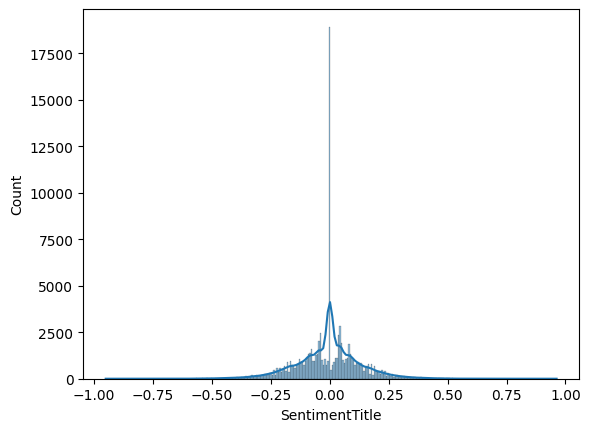

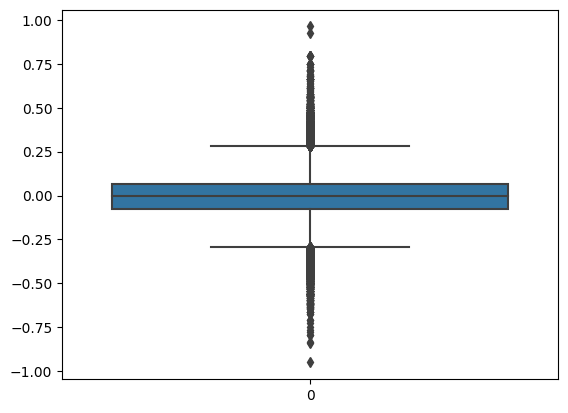

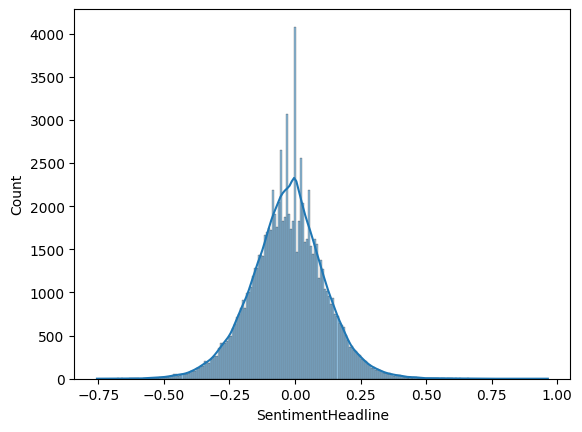

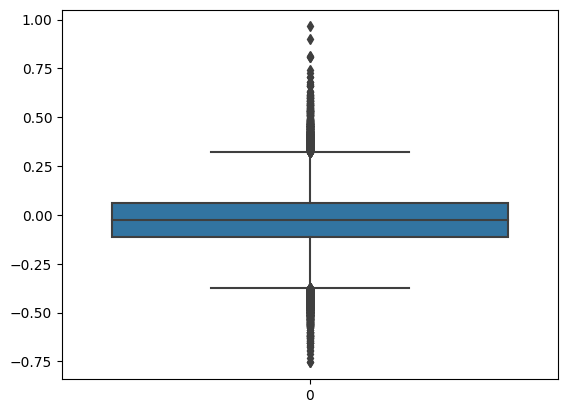

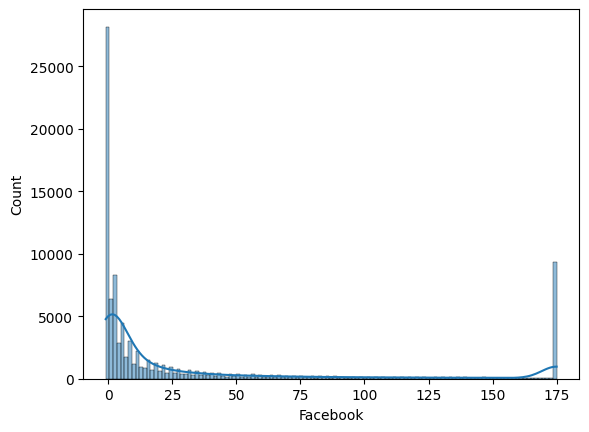

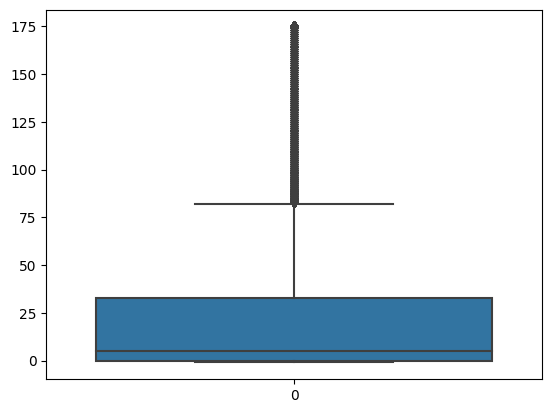

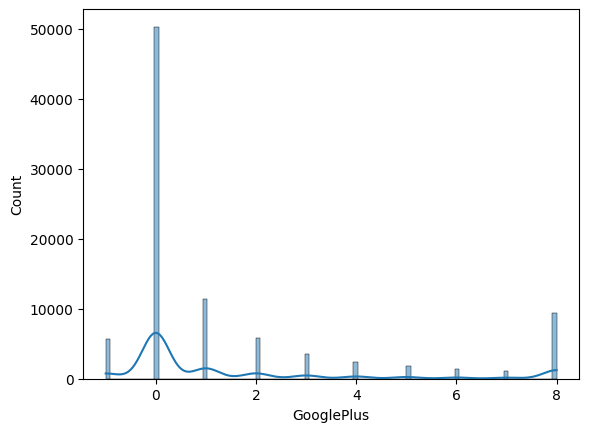

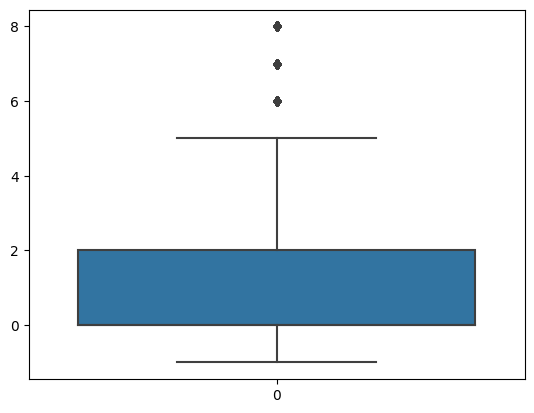

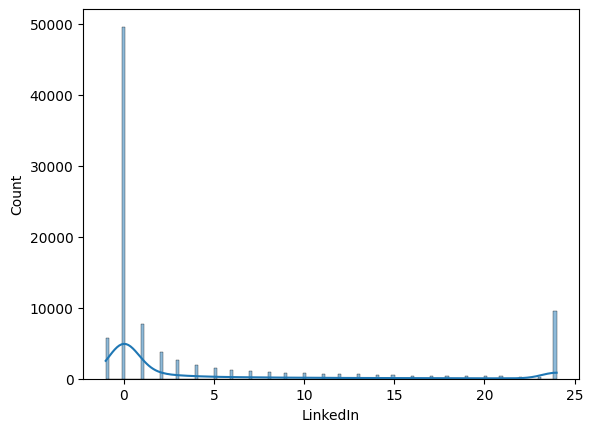

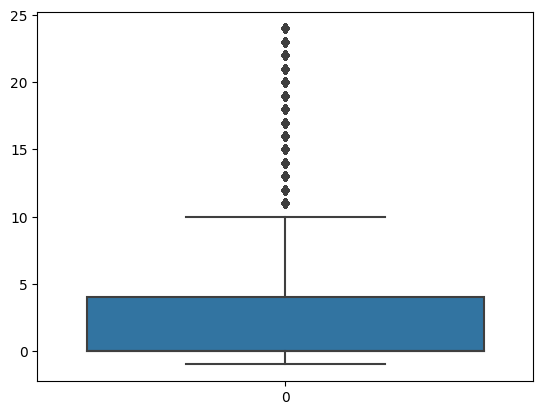

In [13]:
numaric = ['SentimentTitle','SentimentHeadline','Facebook','GooglePlus','LinkedIn']
for num in numaric:
    sns.histplot(data[num], kde=True)
    plt.show()
    sns.boxplot(data[num])
    plt.show()

In [14]:
# Converting source values to lower - We found out that some values of the
# source column are present more than once in different letter-case.

print('No. of Distinct Sources in Original Data set:',len(list(data['Source'].unique())))
data['Source'] = data['Source'].apply(lambda x:x.lower())
print('No. of Distinct Sources After Conversion:',len(list(data['Source'].unique())))

No. of Distinct Sources in Original Data set: 5755
No. of Distinct Sources After Conversion: 5740


In [15]:
data['Source'].value_counts()

Source
bloomberg             1732
reuters               1321
abc news              1098
new york times         992
the guardian           933
                      ... 
rapid tv news            1
ndtvsports.com           1
channel 4 news           1
coconuts hong kong       1
l'humanité               1
Name: count, Length: 5740, dtype: int64

In [16]:
data['Topic'].value_counts()

Topic
economy      33888
obama        28598
microsoft    21851
palestine     8607
Name: count, dtype: int64

<Axes: xlabel='Topic'>

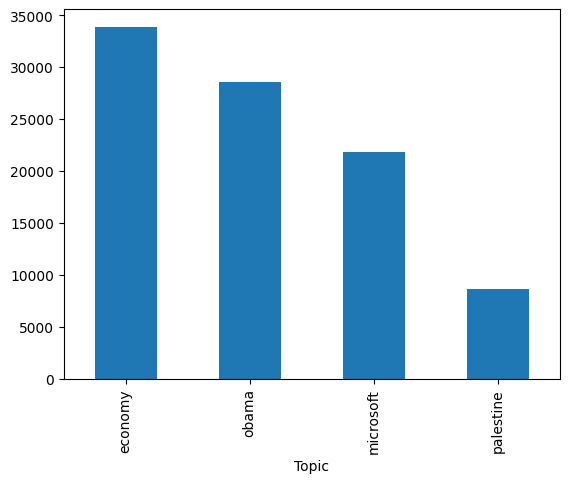

In [17]:
data['Topic'].value_counts().plot.bar()

### Visulization for most frequent words used as per topic

In [18]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['Palestinian','Palestine','Microsoft','Economy','Obama','Barack'])

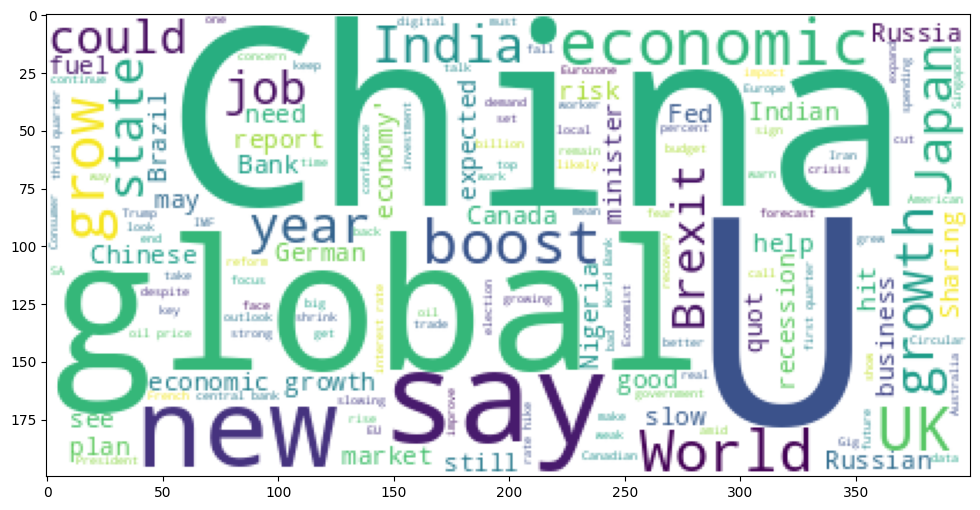

In [19]:
plt.figure(figsize=(12,6))
text = ' '.join(data.Title[data['Topic']=='economy'])
wc = WordCloud(background_color='white',stopwords=stopwords).generate(text)
plt.imshow(wc)

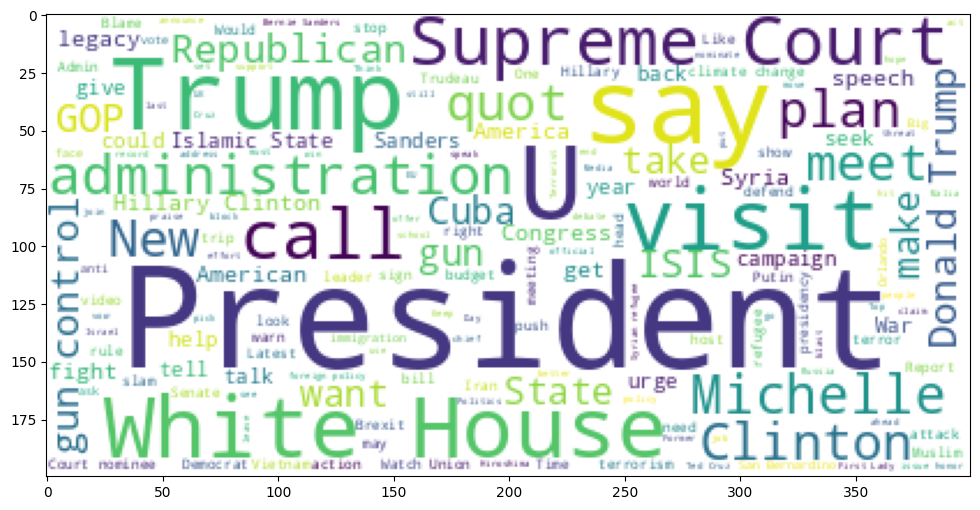

In [20]:
plt.figure(figsize=(12,6))
text = ' '.join(data.Title[data['Topic']=='obama'])
wc = WordCloud(background_color='white',stopwords=stopwords).generate(text)
plt.imshow(wc)

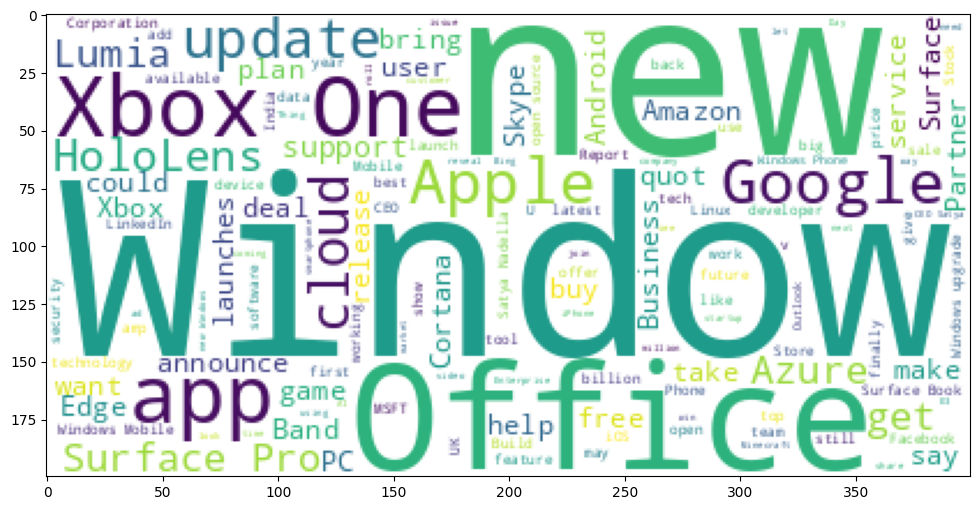

In [21]:
plt.figure(figsize=(12,6))
text = ' '.join(data.Title[data['Topic']=='microsoft'])
wc = WordCloud(background_color='white',stopwords=stopwords).generate(text)
plt.imshow(wc)

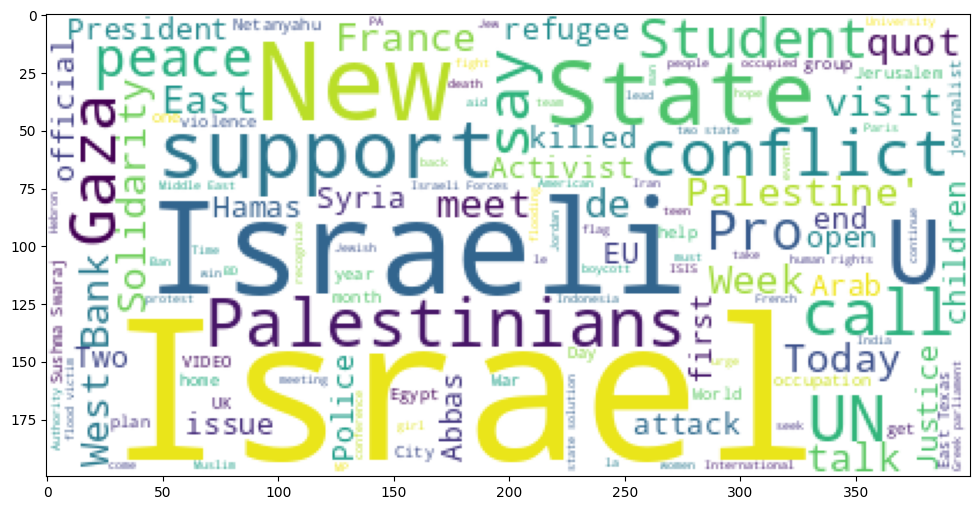

In [22]:
plt.figure(figsize=(12,6))
text = ' '.join(data.Title[data['Topic']=='palestine'])
wc = WordCloud(background_color='white',stopwords=stopwords).generate(text)
plt.imshow(wc)

### Relation b/w Sentiment Title and Sentiment Headline

In [23]:
sns.set(style='darkgrid',palette='Set1')

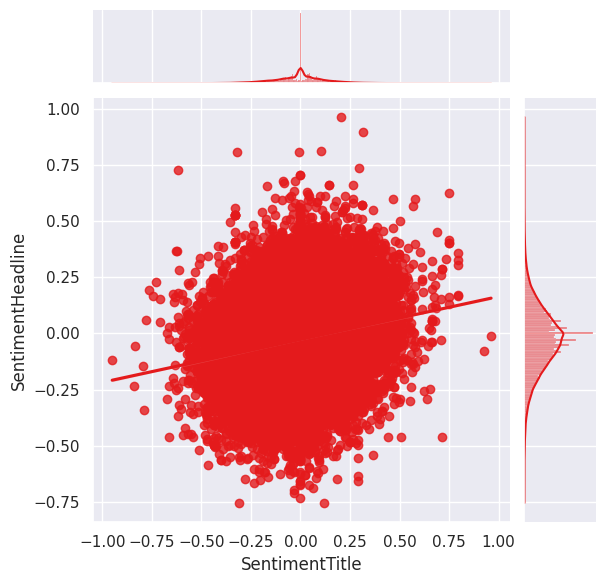

In [24]:
sns.jointplot(x='SentimentTitle',y='SentimentHeadline',data=data,kind = 'reg')
plt.show()

### Correlation plot b/w numerical variables

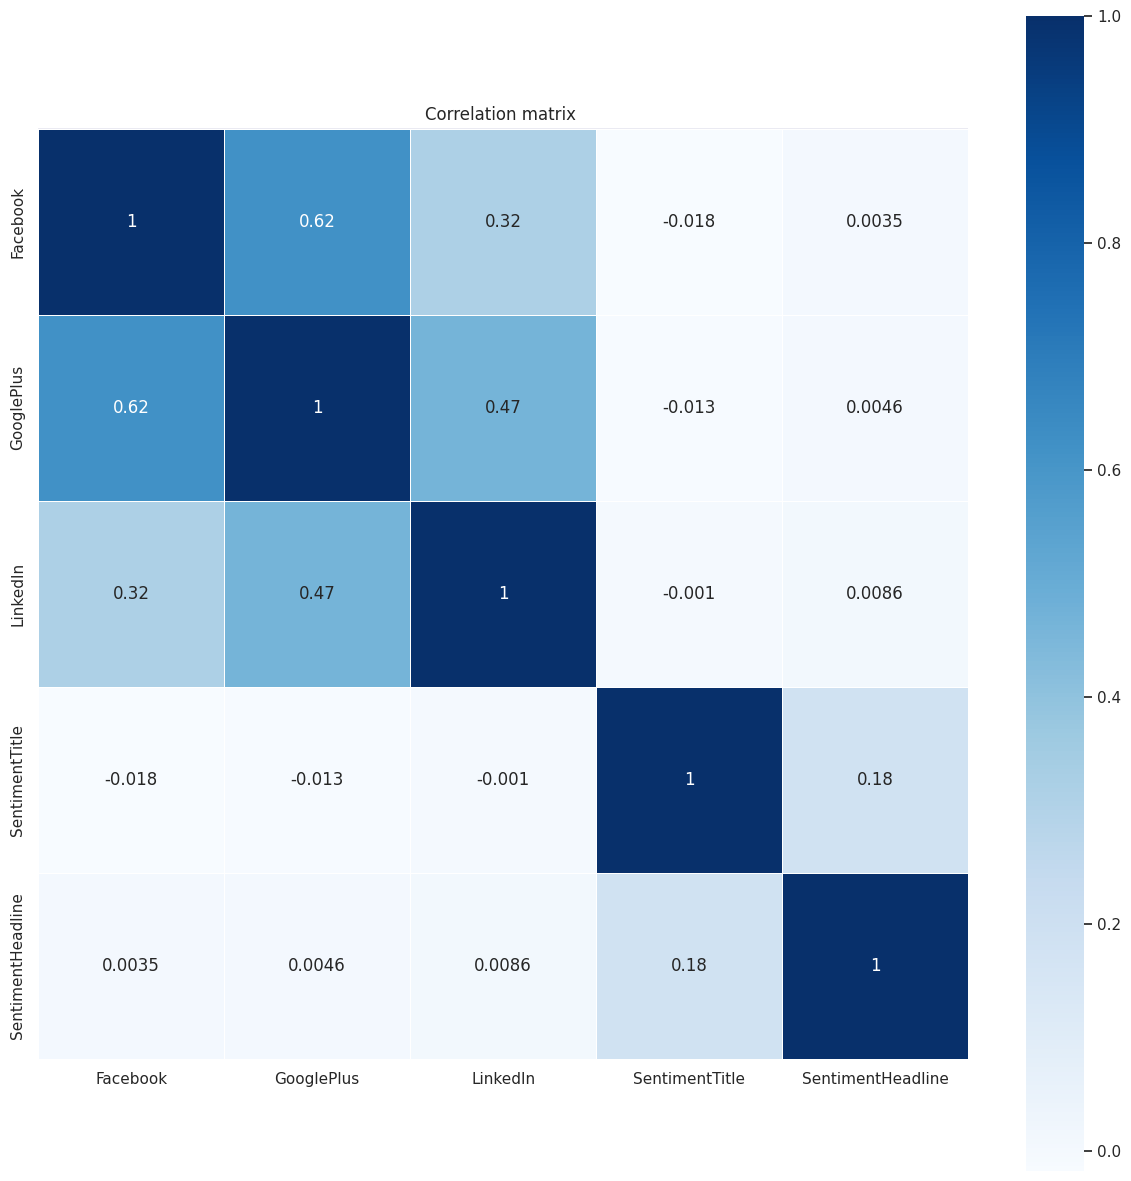

In [25]:
plt.figure(figsize=(15,15))
sns.heatmap(data[['Facebook','GooglePlus','LinkedIn','SentimentTitle','SentimentHeadline']].corr(), square=True, cmap='Blues',linewidths=0.5,linecolor='w',annot=True)
plt.title('Correlation matrix ')

plt.show()

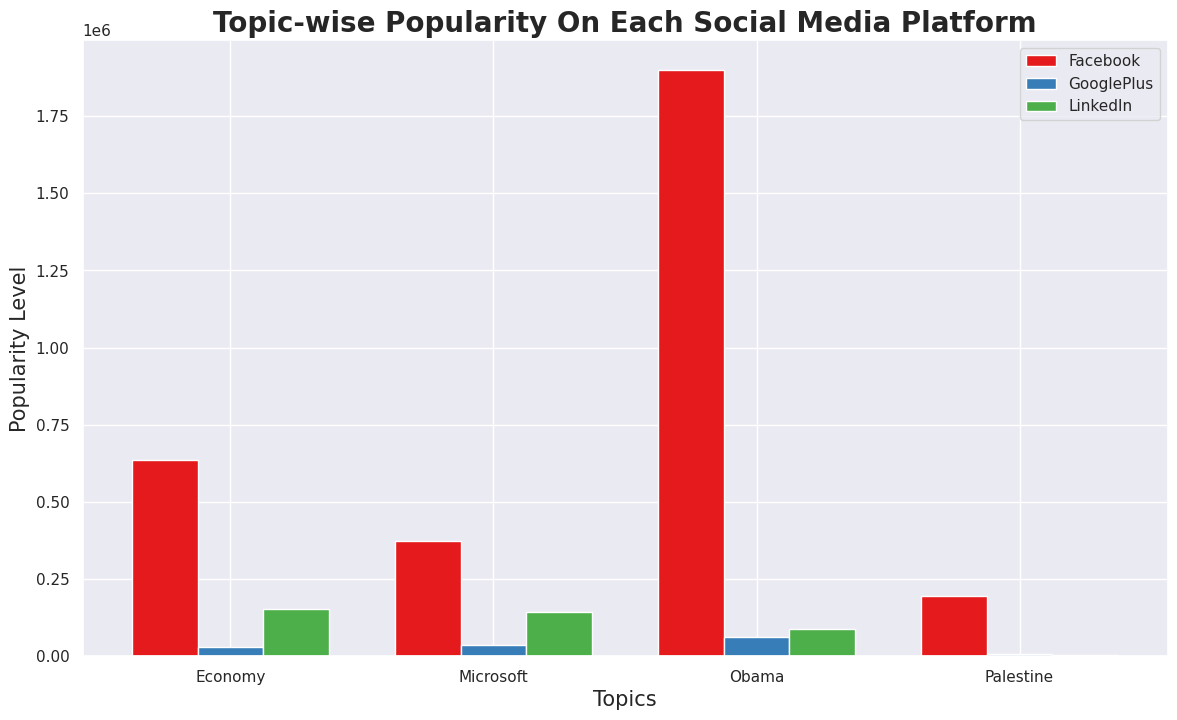

In [26]:
topics = ['Economy','Microsoft', 'Obama', 'Palestine']
def show_popularities(df):
    facebook = abs(data.groupby(['Topic'])['Facebook'].sum())
    googleplus = abs(data.groupby(['Topic'])['GooglePlus'].sum())
    linkedin = abs(data.groupby(['Topic'])['LinkedIn'].sum())

    ind = np.arange(len(topics)) 


    plt.figure(figsize=(14,8))
    plt.bar(ind-0.25,facebook,width=0.25,label='Facebook')
    plt.bar(ind,googleplus,width=0.25,label='GooglePlus')
    plt.bar(ind+0.25,linkedin,width=0.25,label='LinkedIn')

    plt.xticks(ind, topics)
    plt.legend()
    plt.title('Topic-wise Popularity On Each Social Media Platform', fontdict={'size':20, 'fontweight' : 'bold'})
    plt.xlabel('Topics', fontdict={'size':15})
    plt.ylabel('Popularity Level', fontdict={'size':15})
    plt.show()

show_popularities(data)

### Text preprocessing
- Tokenization
- Remove stopwords
- convert tokens to lemmas

#### Tokenization

In [27]:
def get_lemmas_from_string(string):
  doc = nlp(string)
  tokens = [token.text for token in doc] ## creates tokens for the string
  tokens = [token.lower() for token in tokens] ## removes upper case
  stop_words = list(STOP_WORDS) ##  get stop_words
  tokens = [token for token in tokens if token not in stop_words] ## removes stopwords from the string
  tokens_string = ' '.join(tokens) ## joins the tokens
  doc1 = nlp(tokens_string)
  lemmas = [token.lemma_ for token in doc1 if token.is_alpha == True] ## removes periods and gets the lemmas
  lemmas_string = ' '.join(lemmas) ## lemmas_string
  return lemmas_string

In [28]:
data['Title Lemma'] = data['Title'].apply(get_lemmas_from_string)
data['Headline Lemma'] = data['Headline'].apply(get_lemmas_from_string)

In [29]:
data.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,Title Lemma,Headline Lemma
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,usa today,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1.0,-1.0,-1.0,obama lay wreath arlington national cemetery,obama lay wreath arlington national cemetery p...
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1.0,-1.0,-1.0,look health chinese economy,tim haywood investment director business unit ...
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1.0,-1.0,-1.0,nouriel roubini global economy,nouriel roubini nyu professor chairman roubini...
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,rtt news,economy,2015-03-01 00:06:00,0.000000,0.026064,-1.0,-1.0,-1.0,finland gdp expand,finland economy expand marginally month end de...
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,the nation - thailand&#39;s english news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1.0,-1.0,-1.0,tourism govt spending buoy thai economy january,tourism public spending continue boost economy...


In [30]:
def remove_single_letter(text):
  test = text.split()
  final = [word for word in test if len(word)>1]
  final_text = ' '.join(final)
  return final_text

In [31]:
data['Title_final'] = data['Title Lemma'].apply(remove_single_letter)
data['Headline_final'] = data['Headline Lemma'].apply(remove_single_letter)

In [32]:
data.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,Title Lemma,Headline Lemma,Title_final,Headline_final
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,usa today,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1.0,-1.0,-1.0,obama lay wreath arlington national cemetery,obama lay wreath arlington national cemetery p...,obama lay wreath arlington national cemetery,obama lay wreath arlington national cemetery p...
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1.0,-1.0,-1.0,look health chinese economy,tim haywood investment director business unit ...,look health chinese economy,tim haywood investment director business unit ...
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1.0,-1.0,-1.0,nouriel roubini global economy,nouriel roubini nyu professor chairman roubini...,nouriel roubini global economy,nouriel roubini nyu professor chairman roubini...
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,rtt news,economy,2015-03-01 00:06:00,0.000000,0.026064,-1.0,-1.0,-1.0,finland gdp expand,finland economy expand marginally month end de...,finland gdp expand,finland economy expand marginally month end de...
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,the nation - thailand&#39;s english news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1.0,-1.0,-1.0,tourism govt spending buoy thai economy january,tourism public spending continue boost economy...,tourism govt spending buoy thai economy january,tourism public spending continue boost economy...


In [33]:
data.to_csv('/kaggle/working/News_processed_data.csv',chunksize = 512)

In [2]:
data = pd.read_csv('/kaggle/input/news-popularity-in-multiple-social-media-platforms/News_processed_data.csv',index_col=0)

In [3]:
data.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,Title Lemma,Headline Lemma,Title_final,Headline_final
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,usa today,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1.0,-1.0,-1.0,obama lay wreath arlington national cemetery,obama lay wreath arlington national cemetery p...,obama lay wreath arlington national cemetery,obama lay wreath arlington national cemetery p...
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1.0,-1.0,-1.0,look health chinese economy,tim haywood investment director business unit ...,look health chinese economy,tim haywood investment director business unit ...
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1.0,-1.0,-1.0,nouriel roubini global economy,nouriel roubini nyu professor chairman roubini...,nouriel roubini global economy,nouriel roubini nyu professor chairman roubini...
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,rtt news,economy,2015-03-01 00:06:00,0.000000,0.026064,-1.0,-1.0,-1.0,finland gdp expand,finland economy expand marginally month end de...,finland gdp expand,finland economy expand marginally month end de...
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,the nation - thailand&#39;s english news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1.0,-1.0,-1.0,tourism govt spending buoy thai economy january,tourism public spending continue boost economy...,tourism govt spending buoy thai economy january,tourism public spending continue boost economy...


## Feature Genration

### **Categorizing SentimentTitle and SentimentHeadline**
---
We have categoried the sentiment title and sentiment headline into three different categories based on their sentiment scores:
- Positive
- Negative
- Neutral

In [4]:
data['SentimentTitle_Category'] = data['SentimentTitle'].apply(lambda x: 'neutral' if x == 0 else 'positive' if x > 0 else 'negative')

data['SentimentHeadline_Category'] = data['SentimentHeadline'].apply(lambda x: 'neutral' if x == 0 else 'positive' if x > 0 else 'negative')
data.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,Title Lemma,Headline Lemma,Title_final,Headline_final,SentimentTitle_Category,SentimentHeadline_Category
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,usa today,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1.0,-1.0,-1.0,obama lay wreath arlington national cemetery,obama lay wreath arlington national cemetery p...,obama lay wreath arlington national cemetery,obama lay wreath arlington national cemetery p...,neutral,negative
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1.0,-1.0,-1.0,look health chinese economy,tim haywood investment director business unit ...,look health chinese economy,tim haywood investment director business unit ...,positive,negative
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1.0,-1.0,-1.0,nouriel roubini global economy,nouriel roubini nyu professor chairman roubini...,nouriel roubini global economy,nouriel roubini nyu professor chairman roubini...,negative,positive
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,rtt news,economy,2015-03-01 00:06:00,0.000000,0.026064,-1.0,-1.0,-1.0,finland gdp expand,finland economy expand marginally month end de...,finland gdp expand,finland economy expand marginally month end de...,neutral,positive
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,the nation - thailand&#39;s english news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1.0,-1.0,-1.0,tourism govt spending buoy thai economy january,tourism public spending continue boost economy...,tourism govt spending buoy thai economy january,tourism public spending continue boost economy...,neutral,positive


In [5]:
def show_no_of_news_sentiment_title(df):
    print('******** No. of News items of SentimentTitle ********')
    print(df.SentimentTitle_Category.value_counts(),'\n')

    plt.figure(figsize=(10,8))
    df.SentimentTitle_Category.value_counts().plot(kind='bar')
    plt.title('News Items Distribution of Each Sentiment Title', fontdict={'size':20, 'fontweight' : 'bold'})
    plt.xlabel('Sentiment Type',fontdict={'size':15})
    plt.ylabel('No. of News Items',fontdict={'size':15})

def show_no_of_news_sentiment_headline(df):
    print('******** No. of News items of SentimentHeadline ********')
    print(df.SentimentHeadline_Category.value_counts(),'\n')

    plt.figure(figsize=(10,8))
    df.SentimentHeadline_Category.value_counts().plot(kind='bar')
    plt.title('News Items Distribution of Each Sentiment Headline', fontdict={'size':20, 'fontweight' : 'bold'})
    plt.xlabel('Sentiment Type',fontdict={'size':15})
    plt.ylabel('No. of News Items',fontdict={'size':15})


******** No. of News items of SentimentTitle ********
SentimentTitle_Category
negative    37859
positive    36548
neutral     18537
Name: count, dtype: int64 



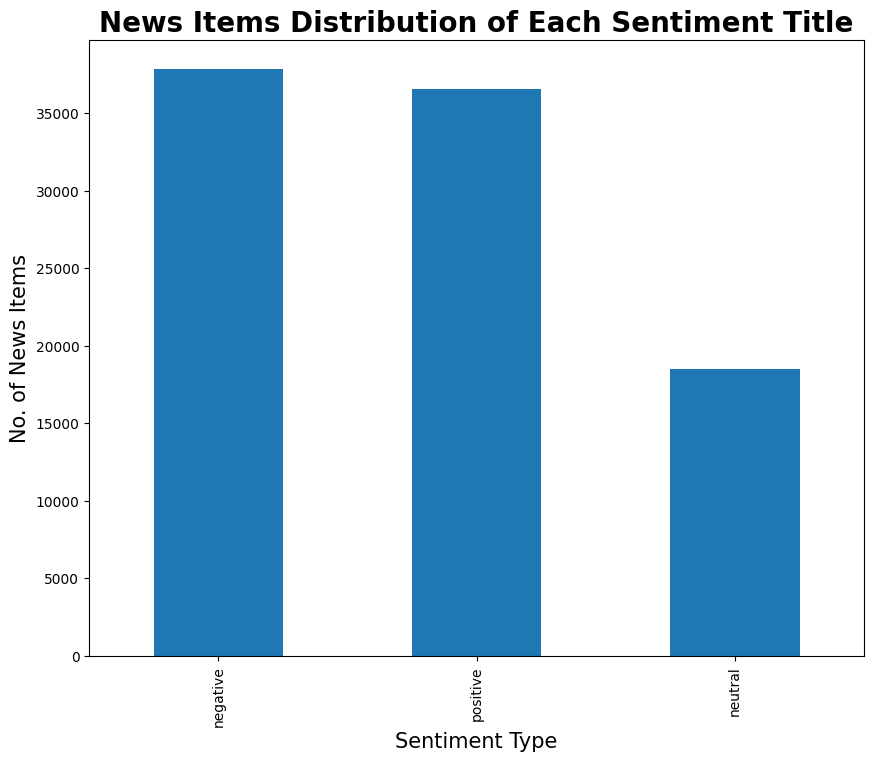

In [6]:
show_no_of_news_sentiment_title(data)

******** No. of News items of SentimentHeadline ********
SentimentHeadline_Category
negative    52512
positive    37568
neutral      2864
Name: count, dtype: int64 



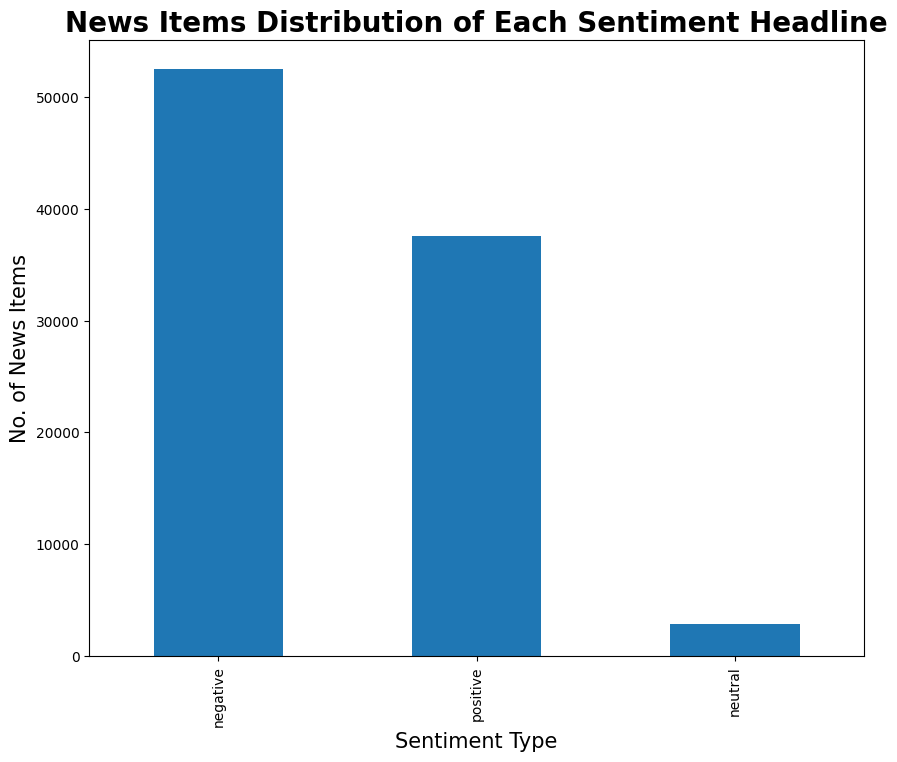

In [7]:
show_no_of_news_sentiment_headline(data)

### **Categorizing Sources**
---
As we can see that we have a lot of news outlets, but it's strenuous to work with such huge amount of varied data. So, we categoried the news outlets primarily into four main categories based on their number of news items published:
- VSmall
- Small
- Big
- VBig

In [8]:
q1 = np.percentile(data['Source'].value_counts().unique(), 25, interpolation = 'midpoint')
q2 = np.percentile(data['Source'].value_counts().unique(), 50, interpolation = 'midpoint')
q3 = np.percentile(data['Source'].value_counts().unique(), 75, interpolation = 'midpoint')
print('----- Quaters -----')
print('> q1: ',q1,'\n> q2:',q2,'\n> q3:',q3)


source_df = pd.DataFrame(data['Source'].value_counts())
source_df = source_df.to_dict(orient='index')
data['Source_type'] = data['Source'].apply(lambda x: 'VS' if source_df[x]['count']<=q1 else 'S' 
                                                     if source_df[x]['count']<=q2 else 'B' if source_df[x]['count']<=q3 else 'VB')
data.drop(columns=['Source'], inplace = True)

----- Quaters -----
> q1:  58.5 
> q2: 128.5 
> q3: 257.0


******** No. of News items in Sources ********
Source_type
VS    33647
VB    31453
B     14462
S     13382
Name: count, dtype: int64 



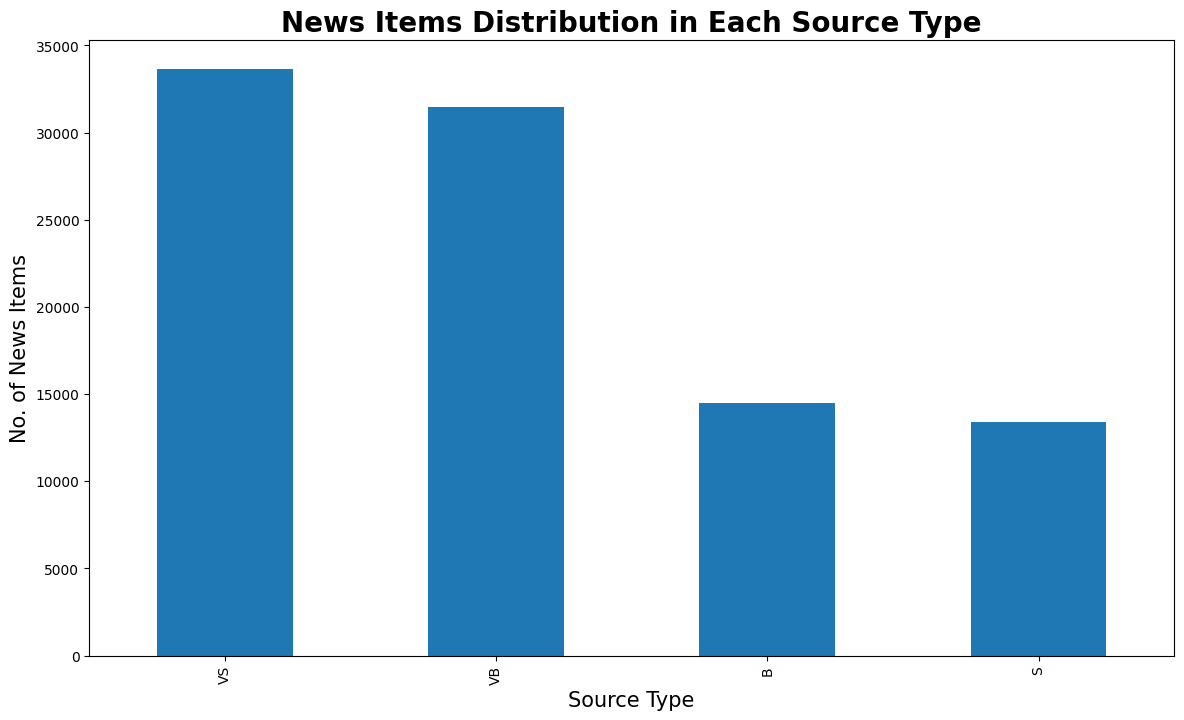

In [9]:
def show_news_distribution_in_sources(df):
    print('******** No. of News items in Sources ********')
    print(df.Source_type.value_counts(),'\n')

    plt.figure(figsize=(14,8))
    df.Source_type.value_counts().plot(kind='bar')
    plt.title('News Items Distribution in Each Source Type', fontdict={'size':20,'fontweight' : 'bold'})
    plt.xlabel('Source Type',fontdict={'size':15})
    plt.ylabel('No. of News Items',fontdict={'size':15})

show_news_distribution_in_sources(data)

### **Working on PublishDate Column**
- We have separated the date and the time into separate columns for the ease of working and analysis.

In [10]:
# PublishDate change type to datetime from object
def convert_to_dt(data):
  data['PublishDate'] = pd.to_datetime(data['PublishDate'])
  data['PublishTime'] = data['PublishDate'].dt.time
  data['PublishDate'] = data['PublishDate'].dt.date

convert_to_dt(data)

import calendar
# Extracting Day of the Week
data['Weekday'] = data.PublishDate.apply(lambda x: calendar.day_name[x.weekday()])

data.head()

,IDLink,Title,Headline,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,Title Lemma,Headline Lemma,Title_final,Headline_final,SentimentTitle_Category,SentimentHeadline_Category,Source_type,PublishTime,Weekday
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,obama,2002-04-02,0.000000,-0.053300,-1.0,-1.0,-1.0,obama lay wreath arlington national cemetery,obama lay wreath arlington national cemetery p...,obama lay wreath arlington national cemetery,obama lay wreath arlington national cemetery p...,neutral,negative,VB,00:00:00,Tuesday
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",economy,2008-09-20,0.208333,-0.156386,-1.0,-1.0,-1.0,look health chinese economy,tim haywood investment director business unit ...,look health chinese economy,tim haywood investment director business unit ...,positive,negative,VB,00:00:00,Saturday
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",economy,2012-01-28,-0.425210,0.139754,-1.0,-1.0,-1.0,nouriel roubini global economy,nouriel roubini nyu professor chairman roubini...,nouriel roubini global economy,nouriel roubini nyu professor chairman roubini...,negative,positive,VB,00:00:00,Saturday
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,economy,2015-03-01,0.000000,0.026064,-1.0,-1.0,-1.0,finland gdp expand,finland economy expand marginally month end de...,finland gdp expand,finland economy expand marginally month end de...,neutral,positive,VS,00:06:00,Sunday
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,economy,2015-03-01,0.000000,0.141084,-1.0,-1.0,-1.0,tourism govt spending buoy thai economy january,tourism public spending continue boost economy...,tourism govt spending buoy thai economy january,tourism public spending continue boost economy...,neutral,positive,VS,00:11:00,Sunday


In [11]:
# Categorizing Months
data['PublishMonth'] = data['PublishDate'].apply(lambda x: calendar.month_name[x.month])

In [12]:
hours = data.PublishTime.apply(lambda x: x.hour)
hours

0         0
1         0
2         0
3         0
4         0
         ..
93234    15
93235    15
93236    15
93237    15
93238    16
Name: PublishTime, Length: 92944, dtype: int64

In [13]:
b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']
data['PublishTime'] = pd.cut(hours, bins=b, labels=l, include_lowest=True)

### Title And Headline Document Length Distribution

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
def add_doc_length():
    countVecorizer = CountVectorizer(analyzer = 'word', stop_words = 'english', max_df=0.7, min_df = 150)
    count_wm_title = countVecorizer.fit_transform(data['Title'])
    
    count_tokens_title = countVecorizer.get_feature_names_out()
    df1 = pd.DataFrame(data = count_wm_title.toarray(),columns = count_tokens_title)

    count_wm_headline = countVecorizer.fit_transform(data['Headline'])
    count_tokens_headline = countVecorizer.get_feature_names_out()
    df2 = pd.DataFrame(data = count_wm_headline.toarray(),columns = count_tokens_headline)
    data['Title_wl'] = df1.sum(axis = 1)
    data['Headline_wl'] = df2.sum(axis = 1)

def show_doc_length_desity_plot(df):
    fig, axes = plt.subplots(1, 2, figsize=(25,7))
    
    sns.distplot(df['Title_wl'], ax= axes[0], color='brown')
    axes[0].set_title('Title',fontdict={'fontsize': '15', 'fontweight' : 'bold'})
    axes[0].set_xlabel('Title Word Length', fontsize = 15)
    axes[0].set_ylabel('Density', fontsize = 15)

    sns.distplot(df['Headline_wl'],ax= axes[1], color='black')
    axes[1].set_title('Headline',fontdict={'fontsize': '15', 'fontweight' : 'bold'})
    axes[1].set_xlabel('Headline Word Length', fontsize = 15)
    axes[1].set_ylabel('Density', fontsize = 15)

    fig.suptitle('Title And Headline Document Length Distribution', fontsize = 22, fontweight = 'bold')


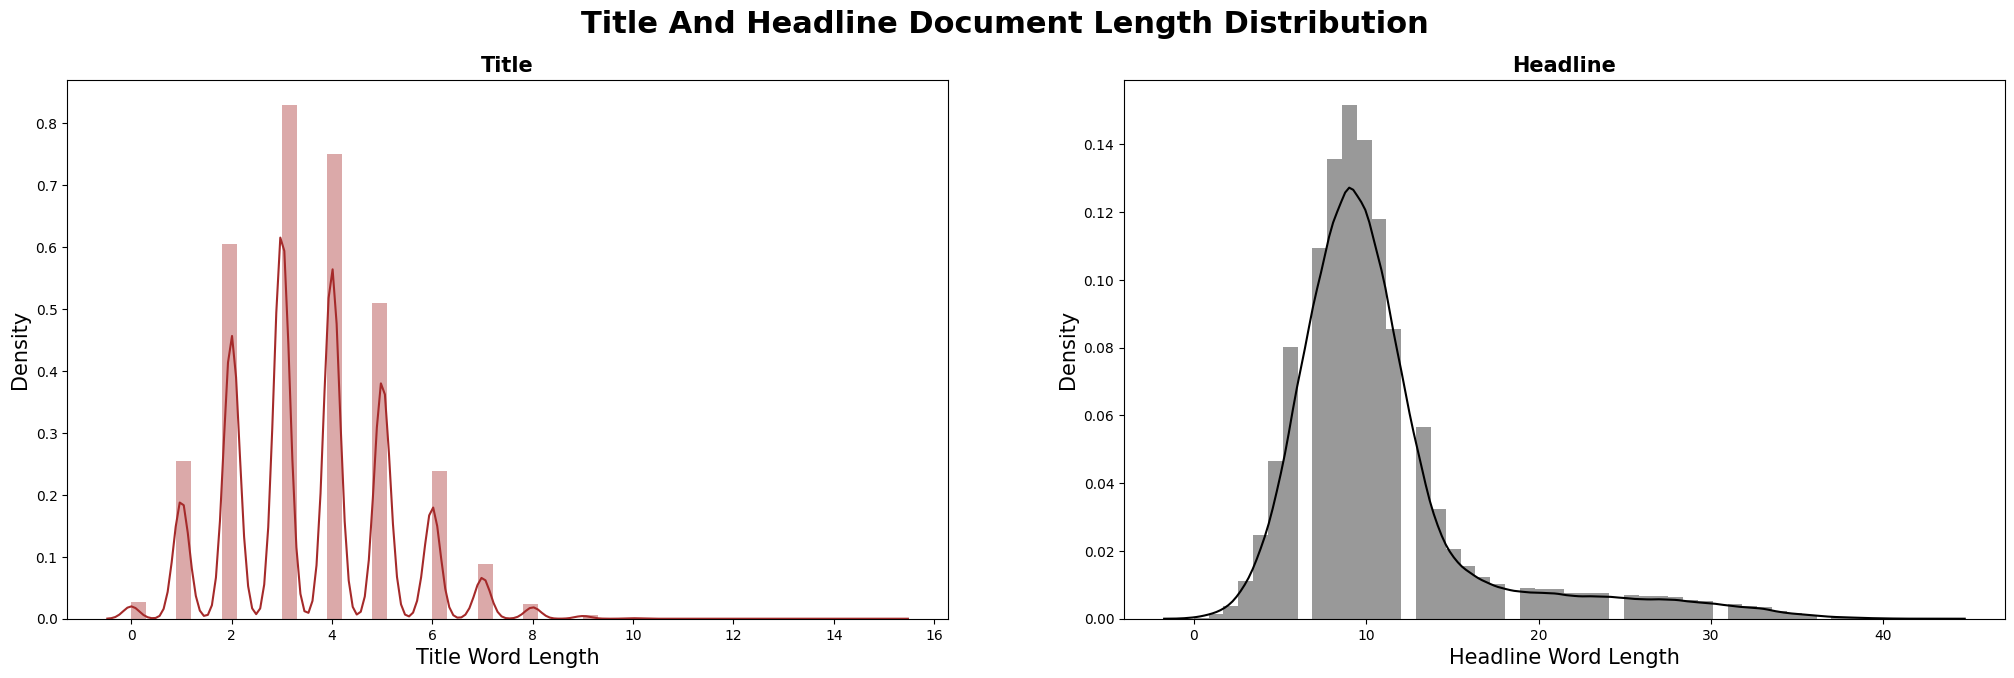

In [15]:
add_doc_length()
show_doc_length_desity_plot(data) 

In [16]:
data

,IDLink,Title,Headline,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,...,Title_final,Headline_final,SentimentTitle_Category,SentimentHeadline_Category,Source_type,PublishTime,Weekday,PublishMonth,Title_wl,Headline_wl
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,obama,2002-04-02,0.000000,-0.053300,-1.0,-1.0,-1.0,...,obama lay wreath arlington national cemetery,obama lay wreath arlington national cemetery p...,neutral,negative,VB,Late Night,Tuesday,April,2.0,6.0
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",economy,2008-09-20,0.208333,-0.156386,-1.0,-1.0,-1.0,...,look health chinese economy,tim haywood investment director business unit ...,positive,negative,VB,Late Night,Saturday,September,4.0,10.0
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",economy,2012-01-28,-0.425210,0.139754,-1.0,-1.0,-1.0,...,nouriel roubini global economy,nouriel roubini nyu professor chairman roubini...,negative,positive,VB,Late Night,Saturday,January,2.0,9.0
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,economy,2015-03-01,0.000000,0.026064,-1.0,-1.0,-1.0,...,finland gdp expand,finland economy expand marginally month end de...,neutral,positive,VS,Late Night,Sunday,March,2.0,11.0
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,economy,2015-03-01,0.000000,0.141084,-1.0,-1.0,-1.0,...,tourism govt spending buoy thai economy january,tourism public spending continue boost economy...,neutral,positive,VS,Late Night,Sunday,March,4.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93234,61851.0,Stocks rise as investors key in on US economy ...,The June employment report is viewed as a cruc...,economy,2016-07-07,0.104284,0.044943,-1.0,3.0,5.0,...,stock rise investor key economy ahead friday,june employment report view crucial gauge heal...,positive,positive,VB,Noon,Thursday,July,NaN,NaN
93235,61865.0,Russian PM proposes to use conservative and to...,"In addition, establish stimulating economic po...",economy,2016-07-07,0.072194,0.000000,-1.0,0.0,1.0,...,russian pm propose use conservative tough scen...,addition establish stimulate economic policy b...,positive,neutral,VB,Noon,Thursday,July,NaN,NaN
93236,104793.0,Palestinian Government Uses Foreign Aid To Pay...,The Palestinian government spends nearly $140 ...,palestine,2016-07-07,0.291667,-0.139754,5.0,1.0,0.0,...,palestinian government use foreign aid pay ter...,palestinian government spend nearly million an...,positive,negative,VB,Noon,Thursday,July,NaN,NaN
93237,104794.0,Palestine Youth Orchestra prepares for first U...,Palestine Youth Orchestra prepares for first U...,palestine,2016-07-07,0.121534,0.092313,0.0,0.0,0.0,...,palestine youth orchestra prepare uk tour,palestine youth orchestra prepare uk tour july...,positive,positive,VS,Noon,Thursday,July,NaN,NaN


## Creating the Target variable

#### **Not Landed On Any Social Media Platform**

- We also have data whose popularity level on every social media platform is 0, i.e. News item never landed on any social media platform.

- To us that data is a trash data because it won't be able to help us identifing one's popularity, instead, it could lead to confusion during model prediction.

- That's why we decided to drop all those rows from our dataset.

In [17]:
# dropping rows whose popularity is -1 in all the social media platforms
index_to_drop = data[(data['Facebook']==-1) & (data['GooglePlus']==-1) & (data['LinkedIn']==-1)].index
print('Shape Before Dropping:',data.shape)


data.drop(index_to_drop,inplace=True)
print('Shape After Dropping:',data.shape)

Shape Before Dropping: (92944, 22)
Shape After Dropping: (87258, 22)


In [18]:
data

,IDLink,Title,Headline,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,...,Title_final,Headline_final,SentimentTitle_Category,SentimentHeadline_Category,Source_type,PublishTime,Weekday,PublishMonth,Title_wl,Headline_wl
726,311.0,Microsoft offering £100 discount on original B...,Just ahead of the market rollout of Microsoft'...,microsoft,2015-11-08,0.000000,-0.132812,0.0,0.0,0.0,...,microsoft offer discount original band uk prio...,ahead market rollout microsoft new band uk sch...,neutral,negative,B,Early Morning,Sunday,November,3.0,19.0
727,252.0,Economy to improve though no change in last 6 ...,"&quot;In the coming six months, there seems to...",economy,2015-11-08,-0.082022,0.205537,0.0,0.0,0.0,...,economy improve change month assocham,coming month grow optimism term economic perfo...,negative,positive,VS,Early Morning,Sunday,November,3.0,23.0
728,227.0,Economy to improve though no change in last 6 ...,"New Delhi, Nov 8 (IANS) Majority of Indian bus...",economy,2015-11-08,-0.082022,0.186968,0.0,0.0,0.0,...,economy improve change month assocham,new delhi nov ians majority indian business op...,negative,positive,S,Early Morning,Sunday,November,2.0,14.0
729,307.0,Microsoft scales back free online storage plans,NEW YORK — Microsoft is getting stingy with on...,microsoft,2015-11-08,0.106303,-0.207333,0.0,0.0,0.0,...,microsoft scale free online storage plan,new york microsoft getting stingy online stora...,positive,negative,VS,Early Morning,Sunday,November,5.0,6.0
730,207.0,IDC predicts the emergence of ‘DX economy’,KUCHING: The global digital economy is about t...,economy,2015-11-08,0.000000,0.003189,1.0,0.0,0.0,...,idc predict emergence dx economy,kuching global digital economy enter new stage...,neutral,positive,VS,Early Morning,Sunday,November,2.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93234,61851.0,Stocks rise as investors key in on US economy ...,The June employment report is viewed as a cruc...,economy,2016-07-07,0.104284,0.044943,-1.0,3.0,5.0,...,stock rise investor key economy ahead friday,june employment report view crucial gauge heal...,positive,positive,VB,Noon,Thursday,July,NaN,NaN
93235,61865.0,Russian PM proposes to use conservative and to...,"In addition, establish stimulating economic po...",economy,2016-07-07,0.072194,0.000000,-1.0,0.0,1.0,...,russian pm propose use conservative tough scen...,addition establish stimulate economic policy b...,positive,neutral,VB,Noon,Thursday,July,NaN,NaN
93236,104793.0,Palestinian Government Uses Foreign Aid To Pay...,The Palestinian government spends nearly $140 ...,palestine,2016-07-07,0.291667,-0.139754,5.0,1.0,0.0,...,palestinian government use foreign aid pay ter...,palestinian government spend nearly million an...,positive,negative,VB,Noon,Thursday,July,NaN,NaN
93237,104794.0,Palestine Youth Orchestra prepares for first U...,Palestine Youth Orchestra prepares for first U...,palestine,2016-07-07,0.121534,0.092313,0.0,0.0,0.0,...,palestine youth orchestra prepare uk tour,palestine youth orchestra prepare uk tour july...,positive,positive,VS,Noon,Thursday,July,NaN,NaN


### Best_SM_Platform

In [19]:
df = pd.DataFrame()
df['Facebook'] = data['Facebook']
df['GooglePlus'] = data['GooglePlus']
df['LinkedIn'] = data['LinkedIn']
data['Best_SM_Platform'] = df.max(axis = 1)
for i in data.index:
    if data['Best_SM_Platform'][i] == data['Facebook'][i]:
       data['Best_SM_Platform'][i] = 'Facebook'
    elif data['Best_SM_Platform'][i] == data['LinkedIn'][i]:
       data['Best_SM_Platform'][i] = 'LinkedIn'
    else:
        data['Best_SM_Platform'][i] = 'GooglePlus'
    
data

,IDLink,Title,Headline,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,...,Headline_final,SentimentTitle_Category,SentimentHeadline_Category,Source_type,PublishTime,Weekday,PublishMonth,Title_wl,Headline_wl,Best_SM_Platform
726,311.0,Microsoft offering £100 discount on original B...,Just ahead of the market rollout of Microsoft'...,microsoft,2015-11-08,0.000000,-0.132812,0.0,0.0,0.0,...,ahead market rollout microsoft new band uk sch...,neutral,negative,B,Early Morning,Sunday,November,3.0,19.0,GooglePlus
727,252.0,Economy to improve though no change in last 6 ...,"&quot;In the coming six months, there seems to...",economy,2015-11-08,-0.082022,0.205537,0.0,0.0,0.0,...,coming month grow optimism term economic perfo...,negative,positive,VS,Early Morning,Sunday,November,3.0,23.0,GooglePlus
728,227.0,Economy to improve though no change in last 6 ...,"New Delhi, Nov 8 (IANS) Majority of Indian bus...",economy,2015-11-08,-0.082022,0.186968,0.0,0.0,0.0,...,new delhi nov ians majority indian business op...,negative,positive,S,Early Morning,Sunday,November,2.0,14.0,GooglePlus
729,307.0,Microsoft scales back free online storage plans,NEW YORK — Microsoft is getting stingy with on...,microsoft,2015-11-08,0.106303,-0.207333,0.0,0.0,0.0,...,new york microsoft getting stingy online stora...,positive,negative,VS,Early Morning,Sunday,November,5.0,6.0,GooglePlus
730,207.0,IDC predicts the emergence of ‘DX economy’,KUCHING: The global digital economy is about t...,economy,2015-11-08,0.000000,0.003189,1.0,0.0,0.0,...,kuching global digital economy enter new stage...,neutral,positive,VS,Early Morning,Sunday,November,2.0,26.0,Facebook
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93234,61851.0,Stocks rise as investors key in on US economy ...,The June employment report is viewed as a cruc...,economy,2016-07-07,0.104284,0.044943,-1.0,3.0,5.0,...,june employment report view crucial gauge heal...,positive,positive,VB,Noon,Thursday,July,NaN,NaN,LinkedIn
93235,61865.0,Russian PM proposes to use conservative and to...,"In addition, establish stimulating economic po...",economy,2016-07-07,0.072194,0.000000,-1.0,0.0,1.0,...,addition establish stimulate economic policy b...,positive,neutral,VB,Noon,Thursday,July,NaN,NaN,LinkedIn
93236,104793.0,Palestinian Government Uses Foreign Aid To Pay...,The Palestinian government spends nearly $140 ...,palestine,2016-07-07,0.291667,-0.139754,5.0,1.0,0.0,...,palestinian government spend nearly million an...,positive,negative,VB,Noon,Thursday,July,NaN,NaN,Facebook
93237,104794.0,Palestine Youth Orchestra prepares for first U...,Palestine Youth Orchestra prepares for first U...,palestine,2016-07-07,0.121534,0.092313,0.0,0.0,0.0,...,palestine youth orchestra prepare uk tour july...,positive,positive,VS,Noon,Thursday,July,NaN,NaN,GooglePlus


In [20]:
data['Best_SM_Platform'].value_counts()

Best_SM_Platform
Facebook      56045
GooglePlus    20180
LinkedIn      11033
Name: count, dtype: int64

### Droping Unrequired variables

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87258 entries, 726 to 93238
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   IDLink                      87258 non-null  float64 
 1   Title                       87258 non-null  object  
 2   Headline                    87258 non-null  object  
 3   Topic                       87258 non-null  object  
 4   PublishDate                 87258 non-null  object  
 5   SentimentTitle              87258 non-null  float64 
 6   SentimentHeadline           87258 non-null  float64 
 7   Facebook                    87258 non-null  float64 
 8   GooglePlus                  87258 non-null  float64 
 9   LinkedIn                    87258 non-null  float64 
 10  Title Lemma                 87241 non-null  object  
 11  Headline Lemma              87253 non-null  object  
 12  Title_final                 87241 non-null  object  
 13  Headline_final     

In [22]:
# Remove three columns as index base
data.drop(data.iloc[:, 0:3], axis=1, inplace=True)
data.drop(data.iloc[:, 2:9], axis=1, inplace=True)
data.drop(['PublishDate'], axis=1, inplace=True)

In [23]:
data

,Topic,Title_final,Headline_final,SentimentTitle_Category,SentimentHeadline_Category,Source_type,PublishTime,Weekday,PublishMonth,Title_wl,Headline_wl,Best_SM_Platform
726,microsoft,microsoft offer discount original band uk prio...,ahead market rollout microsoft new band uk sch...,neutral,negative,B,Early Morning,Sunday,November,3.0,19.0,GooglePlus
727,economy,economy improve change month assocham,coming month grow optimism term economic perfo...,negative,positive,VS,Early Morning,Sunday,November,3.0,23.0,GooglePlus
728,economy,economy improve change month assocham,new delhi nov ians majority indian business op...,negative,positive,S,Early Morning,Sunday,November,2.0,14.0,GooglePlus
729,microsoft,microsoft scale free online storage plan,new york microsoft getting stingy online stora...,positive,negative,VS,Early Morning,Sunday,November,5.0,6.0,GooglePlus
730,economy,idc predict emergence dx economy,kuching global digital economy enter new stage...,neutral,positive,VS,Early Morning,Sunday,November,2.0,26.0,Facebook
...,...,...,...,...,...,...,...,...,...,...,...,...
93234,economy,stock rise investor key economy ahead friday,june employment report view crucial gauge heal...,positive,positive,VB,Noon,Thursday,July,NaN,NaN,LinkedIn
93235,economy,russian pm propose use conservative tough scen...,addition establish stimulate economic policy b...,positive,neutral,VB,Noon,Thursday,July,NaN,NaN,LinkedIn
93236,palestine,palestinian government use foreign aid pay ter...,palestinian government spend nearly million an...,positive,negative,VB,Noon,Thursday,July,NaN,NaN,Facebook
93237,palestine,palestine youth orchestra prepare uk tour,palestine youth orchestra prepare uk tour july...,positive,positive,VS,Noon,Thursday,July,NaN,NaN,GooglePlus


### Dumification

In [24]:
data = pd.get_dummies(data, columns=['Topic','SentimentTitle_Category','SentimentHeadline_Category','Source_type','PublishTime','PublishMonth','Weekday'])

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

## Model Building using Tfidf

In [26]:
data1 = data.sample(frac = 0.25)
Y = data1['Best_SM_Platform']
X = data1.drop(['Best_SM_Platform'], axis=1)
X_Title_final = pd.DataFrame()
X_Headline_final = pd.DataFrame()
X_Title_final = data1['Title_final'].astype(str)
X_Headline_final = data1['Headline_final'].astype(str)

In [27]:
stop_words = list(STOP_WORDS)
tf_idf_H = TfidfVectorizer(stop_words=stop_words, max_df = 0.8)

In [28]:
tf_idf_H.fit(X_Headline_final.values)
X_Headline_final_df = tf_idf_H.transform(X_Headline_final)
X_Headline_final_df = X_Headline_final_df.todense()

In [29]:
X_Headline_final_df = pd.DataFrame(X_Headline_final_df,columns = tf_idf_H.get_feature_names_out())

In [30]:
X_Headline_final_df

,aa,aaa,aaai,aadhaar,aadhar,aap,aapl,aaron,aayog,ab,...,zune,zurawik,zurich,zvi,zwane,âgood,âit,äìhave,été,événement
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
X.drop(['Title_final','Headline_final'], axis=1, inplace=True)

In [32]:
X=X.reset_index()
X.drop(['index'], axis=1, inplace=True)
X

,Title_wl,Headline_wl,Topic_economy,Topic_microsoft,Topic_obama,Topic_palestine,SentimentTitle_Category_negative,SentimentTitle_Category_neutral,SentimentTitle_Category_positive,SentimentHeadline_Category_negative,...,PublishMonth_March,PublishMonth_May,PublishMonth_November,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,1.0,9.0,False,False,False,True,False,False,True,True,...,False,False,False,False,False,True,False,False,False,False
1,3.0,22.0,False,False,True,False,False,False,True,True,...,False,False,False,False,False,True,False,False,False,False
2,5.0,6.0,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,1.0,5.0,True,False,False,False,True,False,False,True,...,False,True,False,False,False,False,False,False,True,False
4,4.0,18.0,False,False,True,False,True,False,False,True,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21809,3.0,6.0,False,False,True,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True
21810,4.0,31.0,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
21811,2.0,5.0,False,True,False,False,True,False,False,True,...,False,False,False,False,False,True,False,False,False,False
21812,1.0,9.0,True,False,False,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,False


In [33]:
X=X.fillna(0)

In [34]:
# Merge all Coloums
X = X.join(X_Headline_final_df)
X

,Title_wl,Headline_wl,Topic_economy,Topic_microsoft,Topic_obama,Topic_palestine,SentimentTitle_Category_negative,SentimentTitle_Category_neutral,SentimentTitle_Category_positive,SentimentHeadline_Category_negative,...,zune,zurawik,zurich,zvi,zwane,âgood,âit,äìhave,été,événement
0,1.0,9.0,False,False,False,True,False,False,True,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,22.0,False,False,True,False,False,False,True,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,6.0,False,True,False,False,True,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,5.0,True,False,False,False,True,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,18.0,False,False,True,False,True,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21809,3.0,6.0,False,False,True,False,True,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21810,4.0,31.0,True,False,False,False,False,False,True,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21811,2.0,5.0,False,True,False,False,True,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21812,1.0,9.0,True,False,False,False,True,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

### Train-Test Split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 123)

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state = 123)

### Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier()
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
y_test_pred = dtree_model.predict(X_test)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75      3495
           1       0.39      0.34      0.37      1277
           2       0.28      0.27      0.28       682

    accuracy                           0.61      5454
   macro avg       0.47      0.46      0.47      5454
weighted avg       0.60      0.61      0.60      5454



### Code for comparing models

Going to keep track of accuracy_score from different models.

In [40]:
EM = pd.DataFrame(columns=['Name','accuracy_score'])
def appendEM(Name,y_acc,y_pred):
  EM.loc[len(EM)] = [Name,accuracy_score(y_acc,y_pred)]

In [46]:
appendEM('DecisionTreeClassifier',y_test,y_test_pred)
EM

,Name,accuracy_score
0,DecisionTreeClassifier,0.610744


### Grid Decision Tree

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [None, 10, 20]}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy', refit = True, verbose = 3)

grid.fit(X_train, y_train)
    
best_classifier = grid.best_estimator_

y_test_pred = best_classifier.predict(X_test)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ....................max_depth=None;, score=0.621 total time=  24.3s
[CV 2/5] END ....................max_depth=None;, score=0.635 total time=  22.8s
[CV 3/5] END ....................max_depth=None;, score=0.613 total time=  29.3s
[CV 4/5] END ....................max_depth=None;, score=0.627 total time=  20.9s
[CV 5/5] END ....................max_depth=None;, score=0.624 total time=  28.4s
[CV 1/5] END ......................max_depth=10;, score=0.688 total time=   7.9s
[CV 2/5] END ......................max_depth=10;, score=0.681 total time=   7.4s
[CV 3/5] END ......................max_depth=10;, score=0.671 total time=   7.2s
[CV 4/5] END ......................max_depth=10;, score=0.680 total time=   6.9s
[CV 5/5] END ......................max_depth=10;, score=0.670 total time=   6.9s
[CV 1/5] END ......................max_depth=20;, score=0.673 total time=   9.3s
[CV 2/5] END ......................max_depth=20;,

In [48]:
appendEM('gridDecisionTreeClassifier',y_test,y_test_pred)
EM

,Name,accuracy_score
0,DecisionTreeClassifier,0.610744
1,gridDecisionTreeClassifier,0.671250


### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [52]:
y_test_pred = lr.predict(X_test)
appendEM('LogisticRegression',y_test,y_test_pred)
EM

,Name,accuracy_score
0,DecisionTreeClassifier,0.610744
1,gridDecisionTreeClassifier,0.671250
2,LogisticRegression,0.671434


In [53]:
from sklearn.linear_model import LogisticRegression
lrb = LogisticRegression(class_weight='balanced')
lrb.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [54]:
y_test_pred = lrb.predict(X_test)
appendEM('LogisticRegression_balanced',y_test,y_test_pred)
EM

,Name,accuracy_score
0,DecisionTreeClassifier,0.610744
1,gridDecisionTreeClassifier,0.671250
2,LogisticRegression,0.671434
3,LogisticRegression_balanced,0.539237


### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
y_test_pred = rf.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.68      0.98      0.80      3495
           1       0.68      0.17      0.28      1277
           2       0.53      0.10      0.16       682

    accuracy                           0.68      5454
   macro avg       0.63      0.42      0.41      5454
weighted avg       0.66      0.68      0.60      5454



In [57]:
appendEM('RandomForestClassifier',y_test,y_test_pred)
EM

,Name,accuracy_score
0,DecisionTreeClassifier,0.610744
1,gridDecisionTreeClassifier,0.671250
2,LogisticRegression,0.671434
3,LogisticRegression_balanced,0.539237
4,RandomForestClassifier,0.679501


### xgboost

In [58]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [59]:
y_test_pred = xgb_clf.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81      3495
           1       0.58      0.31      0.40      1277
           2       0.47      0.21      0.29       682

    accuracy                           0.69      5454
   macro avg       0.59      0.48      0.50      5454
weighted avg       0.66      0.69      0.65      5454



In [60]:
appendEM('xgboostClassifier',y_test,y_test_pred)
EM

,Name,accuracy_score
0,DecisionTreeClassifier,0.610744
1,gridDecisionTreeClassifier,0.671250
2,LogisticRegression,0.671434
3,LogisticRegression_balanced,0.539237
4,RandomForestClassifier,0.679501
5,xgboostClassifier,0.691786


### SVM

In [38]:
from sklearn import svm
svm = svm.SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(X_train, y_train)

SVC(C=10, gamma=0.1)

In [43]:
y_test_pred = svm.predict(X_test)
appendEM('grid_svm',y_test,y_test_pred)
EM

,Name,accuracy_score
0,DecisionTreeClassifier,0.610744
1,gridDecisionTreeClassifier,0.671250
2,LogisticRegression,0.671434
3,LogisticRegression_balanced,0.539237
4,RandomForestClassifier,0.679501
5,xgboostClassifier,0.691786
6,grid_svm,0.642464


## Model Building with Embeddings and NNs

### Tokanization and Padding

In [ ]:
Y = data['Best_SM_Platform']
X = data.drop(['Best_SM_Platform'], axis=1)
X_Title_final = pd.DataFrame()
X_Headline_final = pd.DataFrame()
X_Title_final = data['Title_final'].astype(str)
X_Headline_final = data['Headline_final'].astype(str)

In [ ]:
X_Headline_final

726      ahead market rollout microsoft new band uk sch...
727      coming month grow optimism term economic perfo...
728      new delhi nov ians majority indian business op...
729      new york microsoft getting stingy online stora...
730      kuching global digital economy enter new stage...
                               ...                        
93234    june employment report view crucial gauge heal...
93235    addition establish stimulate economic policy b...
93236    palestinian government spend nearly million an...
93237    palestine youth orchestra prepare uk tour july...
93238    goldstein proprietor tg travel group llc custo...
Name: Headline_final, Length: 87258, dtype: object

In [ ]:
#Title
tokenizerT = Tokenizer()
tokenizerT.fit_on_texts(X_Title_final)

X_Title_final_seq = tokenizerT.texts_to_sequences(X_Title_final)
vocab_sizeT = len(tokenizerT.word_index) + 1

max_lengthT = max(len(seq) for seq in X_Title_final_seq)
X_Title_final_padded = pad_sequences(X_Title_final_seq, maxlen=max_lengthT, padding='post')

#Headline
tokenizerH = Tokenizer()
tokenizerH.fit_on_texts(X_Headline_final)

X_Headline_final_seq = tokenizerH.texts_to_sequences(X_Headline_final)
vocab_sizeH = len(tokenizerH.word_index) + 1

max_lengthH = max(len(seq) for seq in X_Headline_final_seq)
X_Headline_final_padded = pad_sequences(X_Headline_final_seq, maxlen=max_lengthH, padding='post')

In [ ]:
X_Title_final_padded = pd.DataFrame(X_Title_final_padded)
X_Headline_final_padded = pd.DataFrame(X_Headline_final_padded)

In [ ]:
X_Title_final_padded = X_Title_final_padded.add_prefix('T')
X_Headline_final_padded = X_Headline_final_padded.add_prefix('H')

In [ ]:
X_Headline_final_padded

,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9,...,H47,H48,H49,H50,H51,H52,H53,H54,H55,H56
0,398,29,3913,3,9,525,200,826,351,13,...,0,0,0,0,0,0,0,0,0,0
1,8084,23,22,1457,188,8,558,34,4546,584,...,0,0,0,0,0,0,0,0,0,0
2,9,561,793,1299,1046,470,28,1223,11,2,...,0,0,0,0,0,0,0,0,0,0
3,9,308,3,3787,21586,431,866,13,274,220,...,0,0,0,0,0,0,0,0,0,0
4,13856,16,327,2,634,9,832,2301,210,119,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87253,239,750,27,439,1874,2263,330,2,23,27,...,0,0,0,0,0,0,0,0,0,0
87254,1176,1376,1509,8,69,299,1007,5,0,0,...,0,0,0,0,0,0,0,0,0,0
87255,20,25,366,428,105,2537,2886,3468,459,169,...,0,0,0,0,0,0,0,0,0,0
87256,12,1398,8623,690,200,1112,526,1357,12,1398,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.drop(['Title_final','Headline_final'], axis=1, inplace=True)

In [ ]:
X=X.reset_index()
X.drop(['index'], axis=1, inplace=True)
X

,Title_wl,Headline_wl,Topic_economy,Topic_microsoft,Topic_obama,Topic_palestine,SentimentTitle_Category_negative,SentimentTitle_Category_neutral,SentimentTitle_Category_positive,SentimentHeadline_Category_negative,...,PublishMonth_March,PublishMonth_May,PublishMonth_November,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,3.0,19.0,False,True,False,False,False,True,False,True,...,False,False,True,False,False,False,True,False,False,False
1,3.0,23.0,True,False,False,False,True,False,False,False,...,False,False,True,False,False,False,True,False,False,False
2,2.0,14.0,True,False,False,False,True,False,False,False,...,False,False,True,False,False,False,True,False,False,False
3,5.0,6.0,False,True,False,False,False,False,True,True,...,False,False,True,False,False,False,True,False,False,False
4,2.0,26.0,True,False,False,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87253,NaN,NaN,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
87254,NaN,NaN,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
87255,NaN,NaN,False,False,False,True,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
87256,NaN,NaN,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
# # Merge all Coloums
# X = X.join(X_Title_final_padded)
# X = X.join(X_Headline_final_padded)
# X.info()

In [ ]:
# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

In [ ]:
X.isna().sum()

Title_wl                               295
Headline_wl                            295
Topic_economy                            0
Topic_microsoft                          0
Topic_obama                              0
Topic_palestine                          0
SentimentTitle_Category_negative         0
SentimentTitle_Category_neutral          0
SentimentTitle_Category_positive         0
SentimentHeadline_Category_negative      0
SentimentHeadline_Category_neutral       0
SentimentHeadline_Category_positive      0
Source_type_B                            0
Source_type_S                            0
Source_type_VB                           0
Source_type_VS                           0
PublishTime_Late Night                   0
PublishTime_Early Morning                0
PublishTime_Morning                      0
PublishTime_Noon                         0
PublishTime_Eve                          0
PublishTime_Night                        0
PublishMonth_April                       0
PublishMont

In [ ]:
X=X.fillna(0)

In [ ]:
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)
X=np.asarray(X).astype(np.int)

Y=np.asarray(Y).astype(np.int)

### Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test, X_Title_train, X_Title_test, X_Headline_train, X_Headline_test = train_test_split(X, Y, X_Title_final_padded, X_Headline_final_padded, test_size=0.15, random_state = 123)

In [ ]:
X_train, X_val, y_train, y_val, X_Title_train, X_Title_val, X_Headline_train, X_Headline_val = train_test_split(X_train, y_train, X_Title_train, X_Headline_train, test_size=0.10, random_state = 123)

In [ ]:
X_train

array([[ 3, 11,  0, ...,  1,  0,  0],
       [ 2, 21,  1, ...,  1,  0,  0],
       [ 2, 10,  0, ...,  0,  0,  0],
       ...,
       [ 6, 12,  1, ...,  0,  0,  0],
       [ 3,  9,  0, ...,  0,  1,  0],
       [ 4,  9,  0, ...,  0,  0,  1]])

In [ ]:
y_train.shape

(66752, 1)

## Neural Networks

### RNN

In [ ]:
# RNN

# Define the neural network architecture
embedding_dim = 100  # Dimensionality of the word embeddings
rnn_units = 128  # Number of units in the LSTM layer


# Title input branch
title_input = Input(shape=(max_lengthT,))
embedding_layer = Embedding(vocab_sizeT, embedding_dim)(title_input)
rnn_layerT = SimpleRNN(rnn_units)(embedding_layer)

# Headline input branch
headline_input = Input(shape=(max_lengthH,))
embedding_layer = Embedding(vocab_sizeH, embedding_dim)(headline_input)
rnn_layerH = SimpleRNN(rnn_units)(embedding_layer)

# Numerical input branch
numerical_input = Input(shape=(38,))
numerical_dense = Dense(128, activation='relu')(numerical_input)

# Merge the branches
merged = concatenate([rnn_layerT, rnn_layerH, numerical_dense])
dense_layer = Dense(128, activation='relu')(merged)
output = Dense(3, activation='softmax')(dense_layer)  # 3 classes for sentiment prediction

# Create the model
model = Model(inputs=[title_input, headline_input, numerical_input], outputs=output)

# Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit([X_Title_train, X_Headline_train, X_train], y_train, validation_data=([X_Title_val, X_Headline_val, X_val], y_val), epochs=15, batch_size=32, verbose=2)

# Evaluate the model
loss, accuracy = model.evaluate([X_Title_test, X_Headline_test, X_test], y_test, verbose=1)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy*100:.2f}%")

Epoch 1/15
2086/2086 - 188s - loss: 0.4167 - accuracy: 0.8585 - val_loss: 0.3956 - val_accuracy: 0.8665 - 188s/epoch - 90ms/step
Epoch 2/15
2086/2086 - 140s - loss: 0.3709 - accuracy: 0.8694 - val_loss: 0.4084 - val_accuracy: 0.8501 - 140s/epoch - 67ms/step
Epoch 3/15
2086/2086 - 137s - loss: 0.3384 - accuracy: 0.8812 - val_loss: 0.4027 - val_accuracy: 0.8626 - 137s/epoch - 66ms/step
Epoch 4/15
2086/2086 - 136s - loss: 0.3025 - accuracy: 0.8954 - val_loss: 0.4174 - val_accuracy: 0.8565 - 136s/epoch - 65ms/step
Epoch 5/15
2086/2086 - 137s - loss: 0.2710 - accuracy: 0.9058 - val_loss: 0.4482 - val_accuracy: 0.8479 - 137s/epoch - 66ms/step
Epoch 6/15
2086/2086 - 138s - loss: 0.2431 - accuracy: 0.9157 - val_loss: 0.4743 - val_accuracy: 0.8525 - 138s/epoch - 66ms/step
Epoch 7/15
2086/2086 - 143s - loss: 0.2214 - accuracy: 0.9219 - val_loss: 0.5111 - val_accuracy: 0.8307 - 143s/epoch - 69ms/step
Epoch 8/15
2086/2086 - 138s - loss: 0.2033 - accuracy: 0.9270 - val_loss: 0.5162 - val_accuracy: 

### LSTM

In [ ]:
# LSTM

# Define the neural network architecture
embedding_dim = 100  # Dimensionality of the word embeddings
lstm_units = 128  # Number of units in the LSTM layer


# Title input branch
title_input = Input(shape=(max_lengthT,))
embedding_layer = Embedding(vocab_sizeT, embedding_dim)(title_input)
lstm_layerT = LSTM(lstm_units)(embedding_layer)

# Headline input branch
headline_input = Input(shape=(max_lengthH,))
embedding_layer = Embedding(vocab_sizeH, embedding_dim)(headline_input)
lstm_layerH = LSTM(lstm_units)(embedding_layer)

# Numerical input branch
numerical_input = Input(shape=(38,))
numerical_dense = Dense(128, activation='relu')(numerical_input)

# Merge the branches
merged = concatenate([lstm_layerT, lstm_layerH, numerical_dense])
dense_layer = Dense(128, activation='relu')(merged)
output = Dense(3, activation='softmax')(dense_layer)  # 3 classes for sentiment prediction

# Create the model
model = Model(inputs=[title_input, headline_input, numerical_input], outputs=output)

# Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit([X_Title_train, X_Headline_train, X_train], y_train, validation_data=([X_Title_val, X_Headline_val, X_val], y_val), epochs=15, batch_size=32, verbose=2)

# Evaluate the model
loss, accuracy = model.evaluate([X_Title_test, X_Headline_test, X_test], y_test, verbose=1)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy*100:.2f}%")

Epoch 1/15
2086/2086 - 58s - loss: 0.4060 - accuracy: 0.8599 - val_loss: 0.3923 - val_accuracy: 0.8648 - 58s/epoch - 28ms/step
Epoch 2/15
2086/2086 - 21s - loss: 0.3605 - accuracy: 0.8729 - val_loss: 0.3851 - val_accuracy: 0.8645 - 21s/epoch - 10ms/step
Epoch 3/15
2086/2086 - 21s - loss: 0.3300 - accuracy: 0.8849 - val_loss: 0.4030 - val_accuracy: 0.8648 - 21s/epoch - 10ms/step
Epoch 4/15
2086/2086 - 20s - loss: 0.2994 - accuracy: 0.8967 - val_loss: 0.4004 - val_accuracy: 0.8614 - 20s/epoch - 10ms/step
Epoch 5/15
2086/2086 - 20s - loss: 0.2698 - accuracy: 0.9066 - val_loss: 0.4467 - val_accuracy: 0.8583 - 20s/epoch - 10ms/step
Epoch 6/15
2086/2086 - 19s - loss: 0.2398 - accuracy: 0.9169 - val_loss: 0.5111 - val_accuracy: 0.8524 - 19s/epoch - 9ms/step
Epoch 7/15
2086/2086 - 20s - loss: 0.2129 - accuracy: 0.9248 - val_loss: 0.5734 - val_accuracy: 0.8481 - 20s/epoch - 9ms/step
Epoch 8/15
2086/2086 - 20s - loss: 0.1890 - accuracy: 0.9311 - val_loss: 0.5947 - val_accuracy: 0.8502 - 20s/epoc

## Conclusion

For this Open-ended End-term Assignment where we were free to do whatever and design a project to the best of our creative and intellectual ability. For the given dataset, I could think of more then 10 projects just by first time looking at the data. However, if you take the time to really understand the given dataset you would find that their are limitless possibilities. That was the hardest part of this assignment to design such a project which not only allowed me to use my creative, intellectual ability and learnings but also would be usefull to a client that would come to me with a similar dataset.

Therefore, I created my own target variable which expressed that which social media platform would be best for a cretain news article depending upon all the variables avalible in this dataset for example title, headline, source, topic and other variable engineered by me from the given data set such as title word count etc.

My model through this project will able to predict that which social media platform would be best for a cretain news article more then 80% of the time and not just that but also they would be able to use my model to check which way of writing the same article would be best for which social media platform.

